# <h1> FALSE

C:\Users\sinth\AppData\Local\Temp\ipykernel_22396\1018615740.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[['Total Input', 'Total Output']].resample('M').sum().plot(title='Total Input vs. Output Amounts Over Time')


<Figure size 1200x600 with 0 Axes>

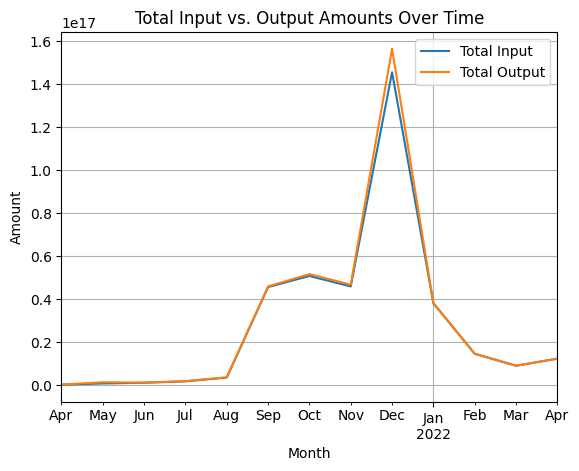

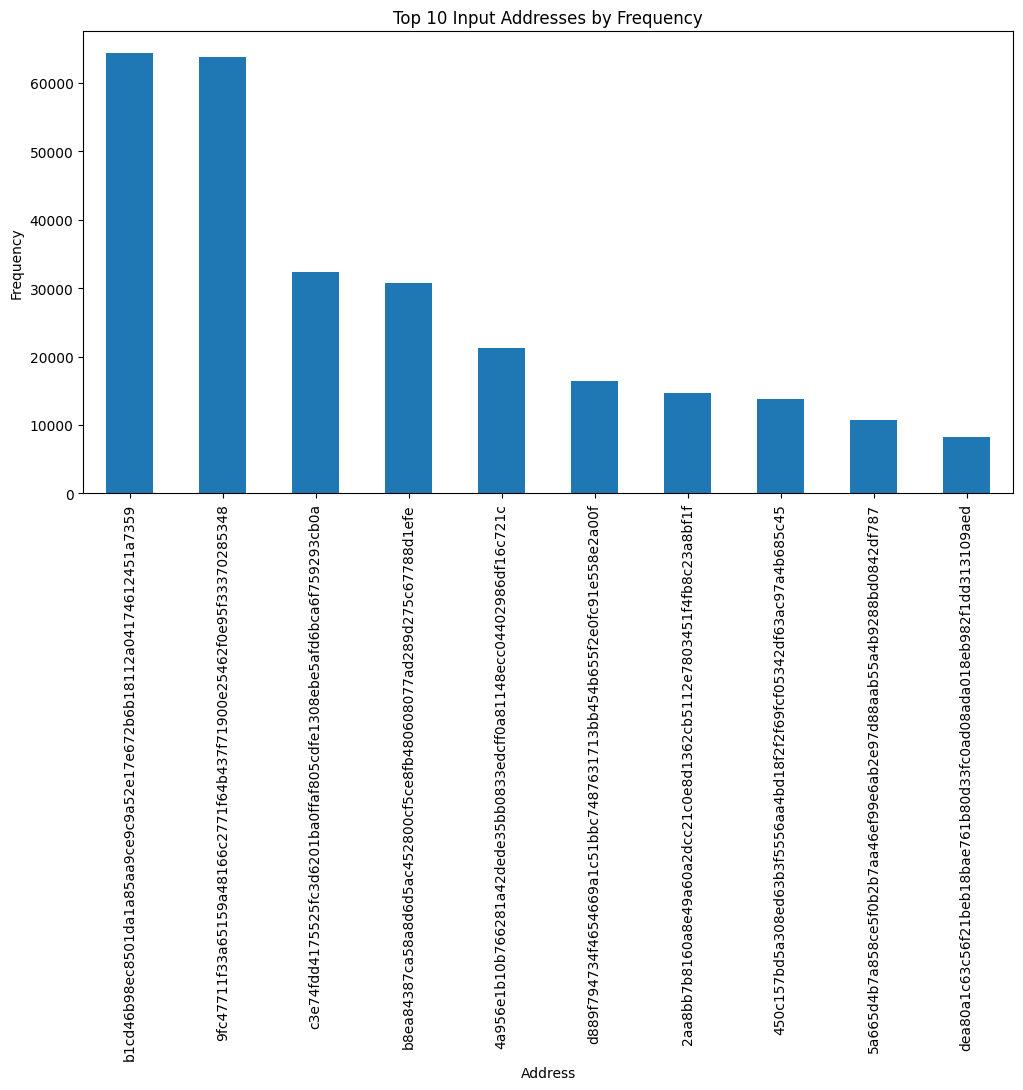

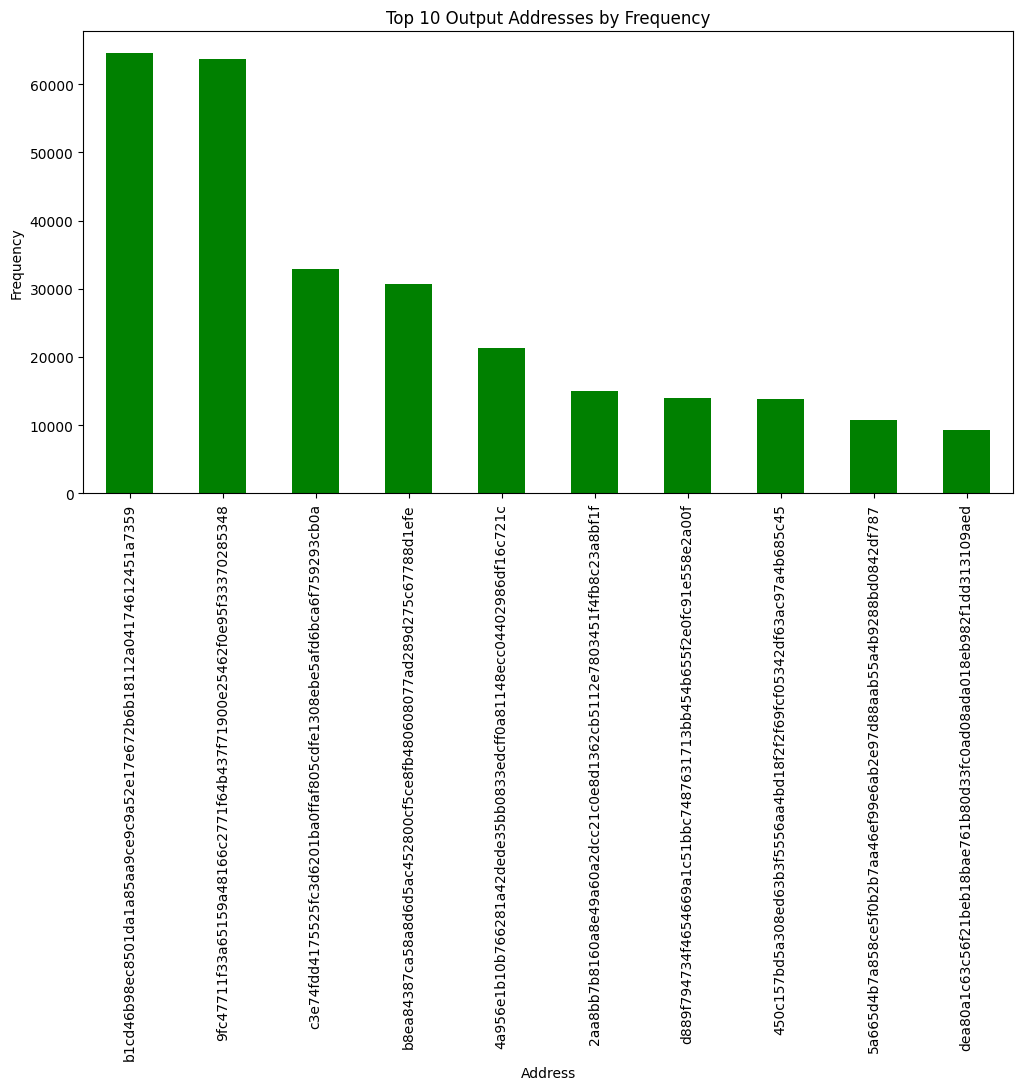

C:\Users\sinth\AppData\Local\Temp\ipykernel_22396\1018615740.py:66: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  average_transaction_size = df['Average Transaction Size'].resample('M').mean()


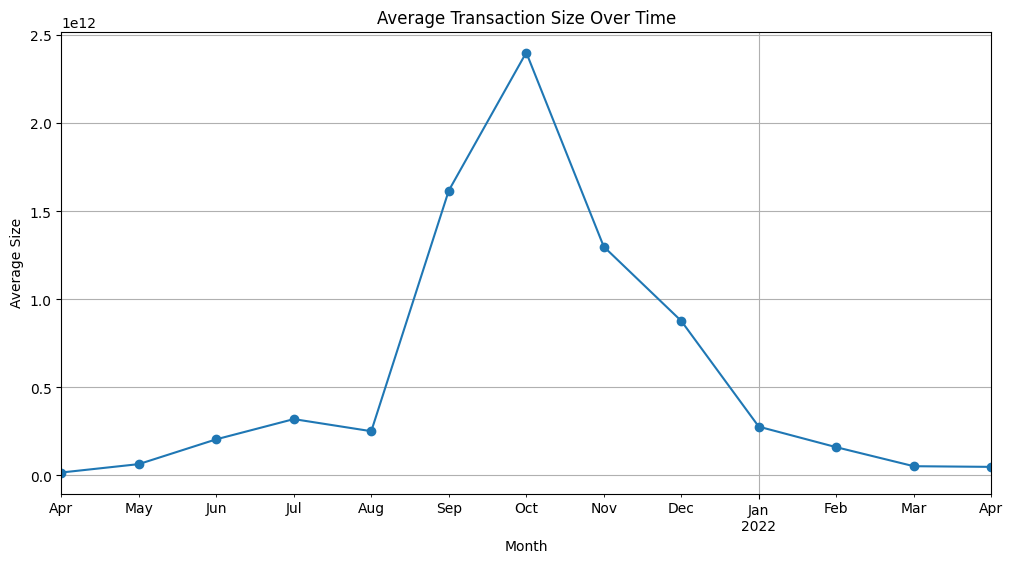

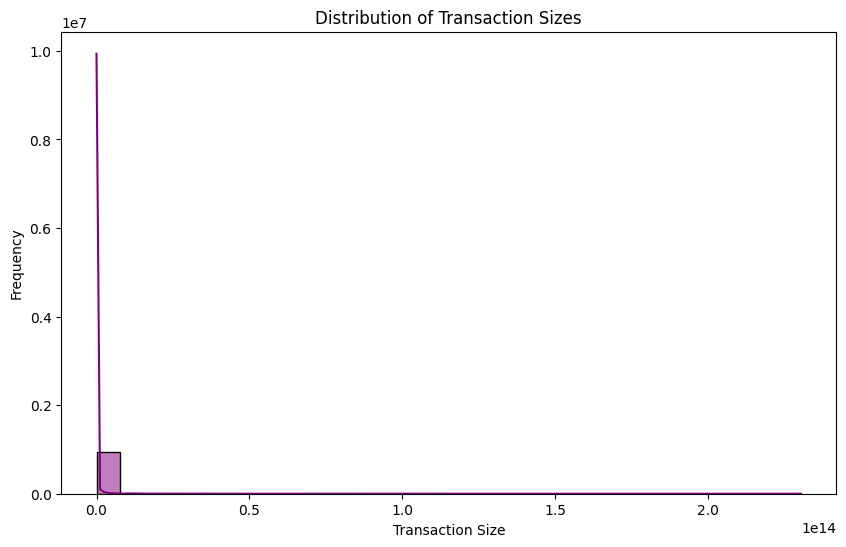

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('iotaDB.db')
cursor = conn.cursor()

# Query the database to get input and output amounts and addresses for all transactions
query = """
SELECT timestamp, input_addresses_x, input_amounts_x, output_addresses_y, output_amounts_y
FROM Transactions
"""
cursor.execute(query)
data = cursor.fetchall()

# Close the database connection
conn.close()

# Create a DataFrame from the results
df = pd.DataFrame(data, columns=['Timestamp', 'Input Addresses', 'Input Amounts', 'Output Addresses', 'Output Amounts'])

# Convert timestamps and parse JSON data
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Input Addresses'] = df['Input Addresses'].apply(eval)  # assuming data is stored in a suitable format
df['Input Amounts'] = df['Input Amounts'].apply(eval)
df['Output Addresses'] = df['Output Addresses'].apply(eval)
df['Output Amounts'] = df['Output Amounts'].apply(eval)

# Set the timestamp as the DataFrame index
df.set_index('Timestamp', inplace=True)

# 1. Total Input vs. Output Amounts Over Time
df['Total Input'] = df['Input Amounts'].apply(sum)
df['Total Output'] = df['Output Amounts'].apply(sum)

plt.figure(figsize=(12, 6))
df[['Total Input', 'Total Output']].resample('M').sum().plot(title='Total Input vs. Output Amounts Over Time')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

# 2. Frequency of Address Usage
input_addresses = pd.Series([address for sublist in df['Input Addresses'] for address in sublist])
output_addresses = pd.Series([address for sublist in df['Output Addresses'] for address in sublist])

input_address_counts = input_addresses.value_counts().head(10)
output_address_counts = output_addresses.value_counts().head(10)

plt.figure(figsize=(12, 6))
input_address_counts.plot(kind='bar', title='Top 10 Input Addresses by Frequency')
plt.xlabel('Address')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
output_address_counts.plot(kind='bar', color='green', title='Top 10 Output Addresses by Frequency')
plt.xlabel('Address')
plt.ylabel('Frequency')
plt.show()

# 3. Average Transaction Size
df['Average Transaction Size'] = (df['Total Input'] + df['Total Output']) / 2
average_transaction_size = df['Average Transaction Size'].resample('M').mean()

plt.figure(figsize=(12, 6))
average_transaction_size.plot(kind='line', marker='o', title='Average Transaction Size Over Time')
plt.xlabel('Month')
plt.ylabel('Average Size')
plt.grid(True)
plt.show()

# 4. Distribution of Transaction Sizes
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Transaction Size'], bins=30, kde=True, color='purple')
plt.title('Distribution of Transaction Sizes')
plt.xlabel('Transaction Size')
plt.ylabel('Frequency')
plt.show()